In [1]:
!pip install pandas numpy matplotlib

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

                     bday_gifts_received
1999-11-18 00:01:00             0.198422
1999-11-18 00:30:00             0.041049
1999-11-18 00:52:00             0.479736
1999-11-18 01:39:00             0.976449
1999-11-18 02:01:00             0.030607
...                                  ...
1999-11-18 22:11:00             0.714102
1999-11-18 22:19:00             0.286651
1999-11-18 22:51:00             0.465821
1999-11-18 23:34:00             0.987994
1999-11-18 23:52:00             0.275129

[100 rows x 1 columns]


<Axes: >

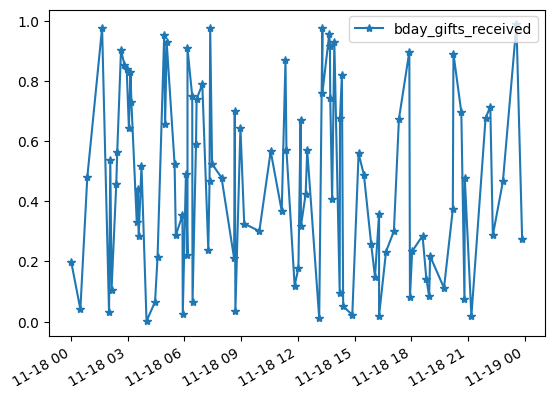

In [57]:
timestamp = pd.date_range('1999-11-18 00:00:00', '1999-11-19 00:00:00', freq='1min')
gift_timestamp = np.random.choice(timestamp, size=100)
gift_timestamp
gift_values = np.random.random(100)
gift_df = pd.DataFrame({'bday_gifts_received': gift_values}, index=gift_timestamp)
gift_df.sort_index(inplace=True)
print(gift_df)
gift_df.plot(marker='*', linestyle='-')

In [58]:
gift_df.index.diff()

TimedeltaIndex([              NaT, '0 days 00:29:00', '0 days 00:22:00',
                '0 days 00:47:00', '0 days 00:22:00', '0 days 00:04:00',
                '0 days 00:04:00', '0 days 00:15:00', '0 days 00:03:00',
                '0 days 00:12:00', '0 days 00:11:00', '0 days 00:07:00',
                '0 days 00:07:00', '0 days 00:05:00', '0 days 00:03:00',
                '0 days 00:17:00', '0 days 00:03:00', '0 days 00:03:00',
                '0 days 00:09:00', '0 days 00:16:00', '0 days 00:27:00',
                '0 days 00:08:00', '0 days 00:21:00', '0 days 00:03:00',
                '0 days 00:05:00', '0 days 00:25:00', '0 days 00:04:00',
                '0 days 00:21:00', '0 days 00:01:00', '0 days 00:10:00',
                '0 days 00:05:00', '0 days 00:00:00', '0 days 00:15:00',
                '0 days 00:01:00', '0 days 00:11:00', '0 days 00:02:00',
                '0 days 00:18:00', '0 days 00:19:00', '0 days 00:04:00',
                '0 days 00:02:00', '0 days 00:06:00

In [59]:
gift_df['time_diff'] = gift_df.index.diff()
gift_df['time_diff'] = gift_df.time_diff.apply(lambda dt: dt.total_seconds()).fillna(0)
gift_df

,bday_gifts_received,time_diff
1999-11-18 00:01:00,0.198422,0.0
1999-11-18 00:30:00,0.041049,1740.0
1999-11-18 00:52:00,0.479736,1320.0
1999-11-18 01:39:00,0.976449,2820.0
1999-11-18 02:01:00,0.030607,1320.0
...,...,...
1999-11-18 22:11:00,0.714102,900.0
1999-11-18 22:19:00,0.286651,480.0
1999-11-18 22:51:00,0.465821,1920.0
1999-11-18 23:34:00,0.987994,2580.0


,bday_gifts_received,time_diff
bday_gifts_received,1.000000,0.086047
time_diff,0.086047,1.000000


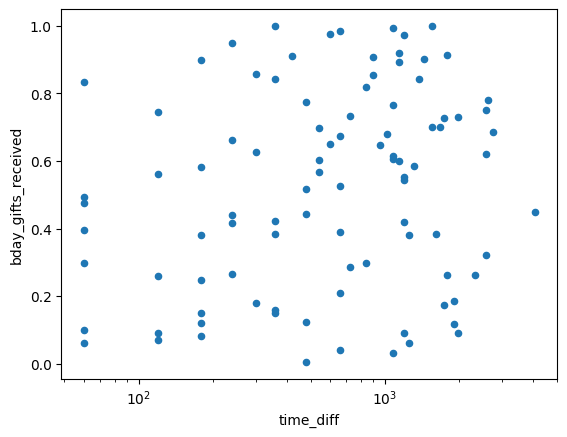

In [6]:
ax = gift_df.plot.scatter('time_diff', 'bday_gifts_received')
ax.set_xscale('log')
gift_df.corr()

In [60]:
# determine number of events by hour
gifts_hr = gift_df.drop('time_diff', axis=1).groupby(lambda x: x.hour).count()
gifts_hr

,bday_gifts_received
0,3
1,1
2,8
3,7
4,5
5,5
6,8
7,5
8,4
9,2


<Axes: >

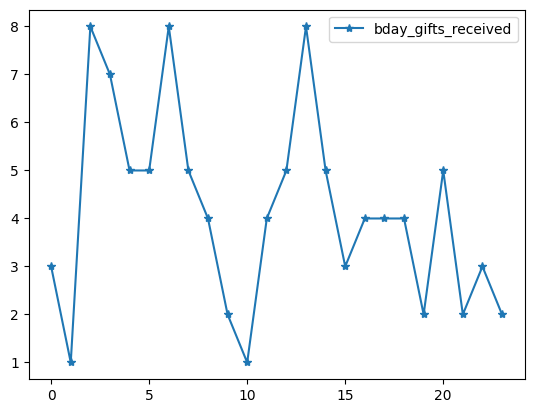

In [61]:
gifts_hr.plot(marker='*', linestyle='-', use_index=True)

In [62]:
avg_likeness = gift_df.drop('time_diff', axis=1).groupby(lambda x: x.hour).mean()
avg_likeness = avg_likeness.rename(columns={"bday_gifts_received": "avg_likeness"})
avg_likeness

,avg_likeness
0,0.239735
1,0.976449
2,0.536536
3,0.538993
4,0.377995
5,0.423444
6,0.569037
7,0.537230
8,0.397380
9,0.312997


<Axes: >

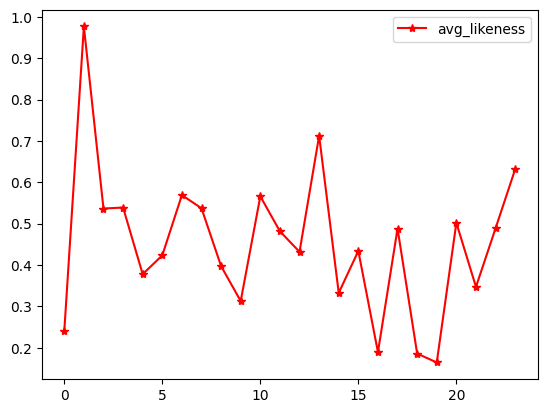

In [63]:
avg_likeness.plot(marker='*', linestyle='-', color='r', use_index=True)

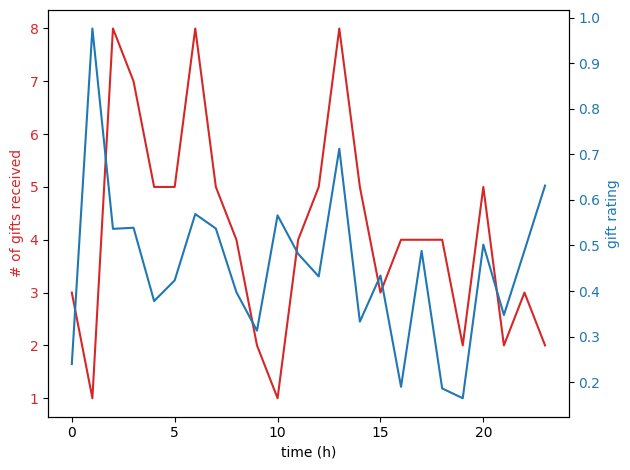

In [64]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (h)')
ax1.set_ylabel('# of gifts received', color=color)
ax1.plot(gifts_hr.index, gifts_hr['bday_gifts_received'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('gift rating', color=color)  # we already handled the x-label with ax1
ax2.plot(avg_likeness.index, avg_likeness['avg_likeness'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<Axes: >

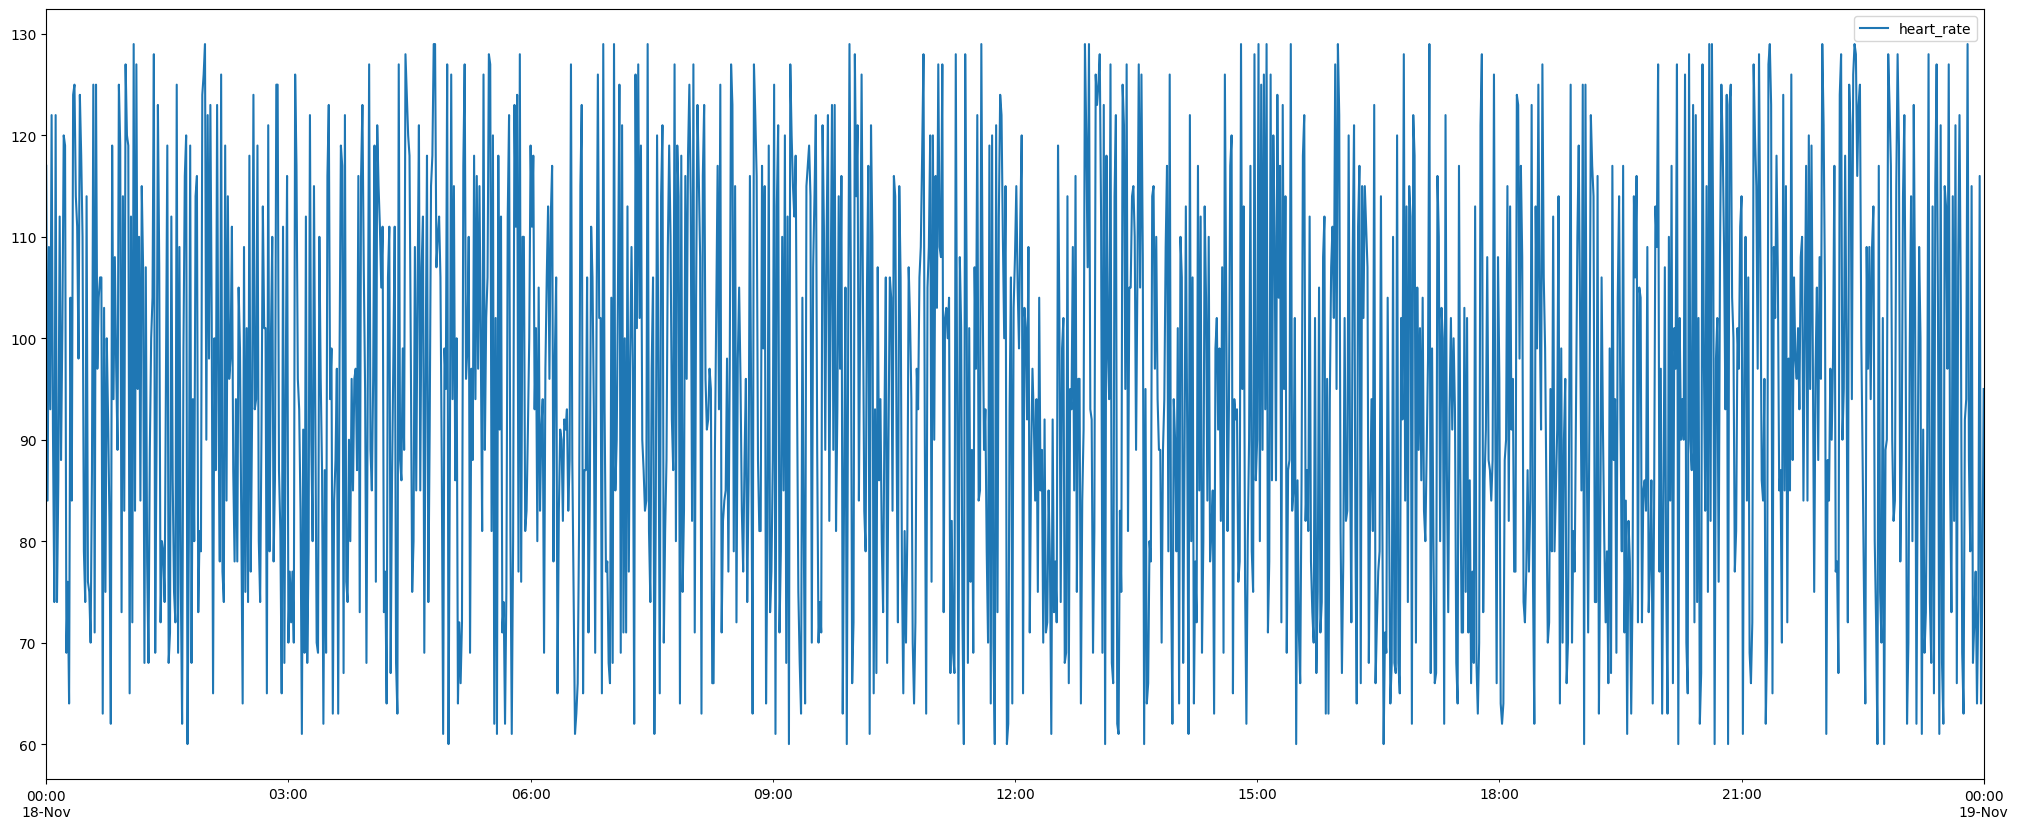

In [66]:
# generate heart rate time series data
# heart rate value for each minute of the day

hr_values = np.random.randint(60, 130, size=1441)
hr_values
hr_df = pd.DataFrame({'heart_rate': hr_values}, index=timestamp)
hr_df.sort_index(inplace=True)
hr_df.plot(linestyle='-', figsize=[25,10])

In [67]:
hr_df

,heart_rate
1999-11-18 00:00:00,117
1999-11-18 00:01:00,84
1999-11-18 00:02:00,109
1999-11-18 00:03:00,93
1999-11-18 00:04:00,122
...,...
1999-11-18 23:56:00,74
1999-11-18 23:57:00,116
1999-11-18 23:58:00,64
1999-11-18 23:59:00,76


    avg_heart_rate
0        97.737705
1        94.700000
2        95.400000
3        90.600000
4        98.983333
5        96.383333
6        92.166667
7        97.766667
8        95.100000
9        97.100000
10       94.550000
11       94.500000
12       91.483333
13       97.866667
14       91.700000
15       94.900000
16       91.650000
17       89.250000
18       91.416667
19       90.333333
20       95.916667
21       98.066667
22       99.166667
23       91.700000


<Axes: >

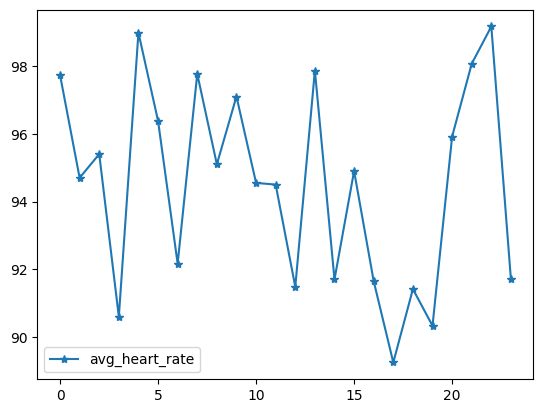

In [68]:
hourly_mean_hr = hr_df.groupby(lambda x: x.hour).mean().rename(columns={"heart_rate": "avg_heart_rate"})
print(hourly_mean_hr)
hourly_mean_hr.plot(marker='*', linestyle='-')

In [69]:
# combine no. of gifts per hour, avg likeness per hour, and avg heart rate per hour data

hr_window_timestamp = pd.date_range('1999-11-18 00:00:00', '1999-11-18 23:00:00', freq='1h')

hr_window_df = pd.DataFrame({'no_of_gifts': gifts_hr['bday_gifts_received'].tolist(),
                                'avg_likeness': avg_likeness['avg_likeness'].tolist(),
                                'avg_heart_rate': hourly_mean_hr['avg_heart_rate'].tolist()}, 
                                index=hr_window_timestamp)

hr_window_df

,no_of_gifts,avg_likeness,avg_heart_rate
1999-11-18 00:00:00,3,0.239735,97.737705
1999-11-18 01:00:00,1,0.976449,94.700000
1999-11-18 02:00:00,8,0.536536,95.400000
1999-11-18 03:00:00,7,0.538993,90.600000
1999-11-18 04:00:00,5,0.377995,98.983333
1999-11-18 05:00:00,5,0.423444,96.383333
1999-11-18 06:00:00,8,0.569037,92.166667
1999-11-18 07:00:00,5,0.537230,97.766667
1999-11-18 08:00:00,4,0.397380,95.100000
1999-11-18 09:00:00,2,0.312997,97.100000


In [20]:
# window by time periods in between events?

# hr_by_event = hr_df.groupby(gift_df.index).mean()

In [70]:
# working version of EventSeries class

class EventSeries:
    def __init__(self, data):
        self.data = data.sort_index()
        self.event_time_data_windows = {}

    # for adding more event entries (rows)
    def __add__(self, events):
        self.data = self.data.concat(events, ignore_index=True)

    # add column of data to the existing events
    def add_columns(self, col, col_name):
        # col should be a list of data values
        self.data.loc[:, col_name] = col

    def add_time_series(self, ts, period, agg_func_name, window_name, period_num=1, es_cols_drop=[]):
        # ts is TimeSeries object
        # period_num is amount of time period (for example 2 hours) 
        # period is unit of time (i.e. 'hour') or eventually possibly custom list of time ranges
        # agg_func can be mean(), median(), count(), etc.
        ts_window = ts.data.groupby(lambda x: getattr(x, period) // period_num)
        if agg_func_name == 'mean':
            ts_window = ts_window.mean()
        elif agg_func_name == 'median':
            ts_window = ts_window.median()
        elif agg_func_name == 'max':
            ts_window = ts_window.max()
        elif agg_func_name == 'min':
            ts_window = ts_window.min()
        elif agg_func_name == 'sum':
            ts_window = ts_window.sum()
        elif agg_func_name == 'count':
            ts_window = ts_window.count()
        else:
            raise ValueError('The agg_func_name inputted is not supported.')
        '''
        if period == 'year':
            ts_window = ts.data.groupby(lambda x: x.year() // period_num, agg_func)
        elif period == 'month':
            ts_window = ts.data.groupby(lambda x: x.month() // period_num, agg_func)
        elif period == 'day':
            ts_window = ts.data.groupby(lambda x: x.day() // period_num, agg_func)
        elif period == 'hour':
            ts_window = ts.data.groupby(lambda x: x.hour() // period_num, agg_func)
        elif period == 'minute':
            ts_window = ts.data.groupby(lambda x: x.minute() // period_num, agg_func)
        elif period == 'second':
            ts_window = ts.data.groupby(lambda x: x.second() // period_num, agg_func)
        else:
            raise ValueError('The time period is not valid.')
        '''
        es_window = self.window(period, cols_to_drop=es_cols_drop)
        self.event_time_data_windows[window_name] = [es_window, ts_window]

    # for windowing event series according to certain periods
    # number of events per time period specified
    def window(self, period, period_num=1, cols_to_drop=[]):
        edited_data = self.data.drop(cols_to_drop, axis=1)
        return((edited_data.groupby(lambda x: getattr(x, period) // period_num)).count())
        '''
        if period == 'year':
            return(edited_data.groupby(lambda x: x.year()).count())
        elif period == 'month':
            return(edited_data.groupby(lambda x: x.month()).count())
        elif period == 'day':
            return(edited_data.groupby(lambda x: x.day()).count())
        elif period == 'hour':
            return(edited_data.groupby(lambda x: x.hour()).count())
        elif period == 'minute':
            return(edited_data.groupby(lambda x: x.minute()).count())
        else:
            raise ValueError('The time period is not valid.')
        '''

    # function for returning aggregate stats of a certain data column over time?
        # i.e. average likeness for every hr
    
    # def describe(self):
        # output number of events, mean, median, mode, min, and max values for each column of data 
    
    # def plot_event_series(self, marker, linestyle=None, title=''):
        # self.data = self.data.sort_index(inplace=True)
        # self.data.plot(marker=marker, linestyle=linestyle)

    def plot_event_time_data_window(self, name, xlabel, ylabel_es, ylabel_ts, title=''):
        # based on code from https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html
        fig, ax1 = plt.subplots()
        # plot the event series data
        color = 'tab:red'
        ax1.set_xlabel(xlabel)
        ax1.set_ylabel(ylabel_es, color=color)
        ax1.plot(self.event_time_data_windows[name][0].index, self.event_time_data_windows[name][0].loc[:, ylabel_es], color=color)
        ax1.tick_params(axis='y', labelcolor=color)
        
        # plot the time series data
        ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
        color = 'tab:blue'
        ax2.set_ylabel(ylabel_ts, color=color)  # we already handled the x-label with ax1
        ax2.plot(self.event_time_data_windows[name][1].index, self.event_time_data_windows[name][1].loc[:, ylabel_ts], color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()  # otherwise the right y-label is slightly clipped
        plt.title(title)
        plt.show()


In [71]:
class TimeSeries:
    def __init__(self, data, agg_func=None):
        self.data = data
        self.agg_func = agg_func

    def __add__(self, other):
        if isinstance(other, TimeSeries):
            ts1 = TimeSeries(self.data, self.agg_func)
            ts2 = other
            tf = TimeFrame(ts1) + TimeFrame(ts2)
            return tf
        else:
            raise ValueError('You can only add TimeSeries objects to TimeSeries objects.')

    def window(self, freq):
        return self.data.groupby(pd.Grouper(freq=freq)).apply(self.agg_func)

    def apply(self):
        raise NotImplementedError('TODO!')

In [72]:
# initial test of event series class

es = EventSeries(gift_df)
hr_ts = TimeSeries(hr_df)
es.add_time_series(hr_ts, 'hour', 'mean', 'heart_rate_data', es_cols_drop=['time_diff'])

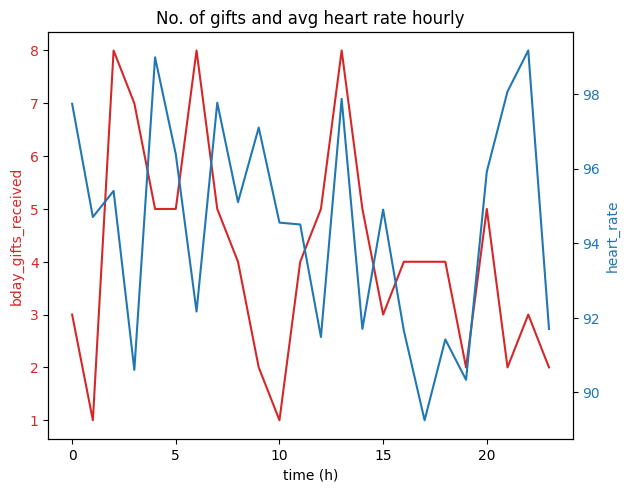

In [73]:
# test plotting an event-time data window

es.plot_event_time_data_window('heart_rate_data', 'time (h)', 'bday_gifts_received', 'heart_rate', title='No. of gifts and avg heart rate hourly')

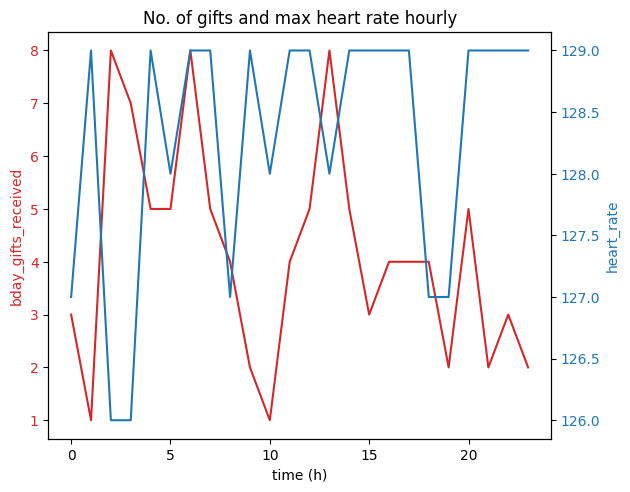

In [74]:
es.add_time_series(hr_ts, 'hour', 'max', 'heart_rate_data', es_cols_drop=['time_diff'])
es.plot_event_time_data_window('heart_rate_data', 'time (h)', 'bday_gifts_received', 'heart_rate', title='No. of gifts and max heart rate hourly')

In [84]:
# generate more realistic heart rate data

avg_hr = (np.sum(hr_values) / hr_values.size).item()

new_hr_values = []
start = 0
for time in gift_df.index:
    t_e = (60 * time.hour) + time.minute
    for t in range(start, t_e+1):
        if t == t_e:
            # add a peak heart rate value of 160 to new_hr_values
            high_hr = np.random.randint(156, 166)
            new_hr_values.append(high_hr)
            start = t + 1
            continue
        else:
            # add 1/t_i-t_e to new_hr_values
            new_hr = round(avg_hr + 60 * (1 / (t_e - t)))
            new_hr_values.append(new_hr)

if t_e+1 <= timestamp.size:
    for i in range(t_e+1, timestamp.size):
        new_hr_values.append(avg_hr)

new_hr_values

[155,
 164,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 98,
 98,
 98,
 98,
 98,
 99,
 99,
 99,
 100,
 100,
 101,
 101,
 102,
 103,
 105,
 107,
 110,
 115,
 125,
 155,
 164,
 97,
 98,
 98,
 98,
 98,
 98,
 99,
 99,
 99,
 100,
 100,
 101,
 101,
 102,
 103,
 105,
 107,
 110,
 115,
 125,
 155,
 161,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 96,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 97,
 98,
 98,
 98,
 98,
 98,
 99,
 99,
 99,
 100,
 100,
 101,
 101,
 102,
 103,
 105,
 107,
 110,
 115,
 125,
 155,
 162,
 97,
 98,
 98,
 98,
 98,
 98,
 99,
 99,
 99,
 100,
 100,
 101,
 101,
 102,
 103,
 105,
 107,
 110,
 115,
 125,
 155,
 163,
 115,
 125,
 155,
 160,
 115,
 125,
 155,
 164,
 99,
 99,
 100,
 100,
 101,
 101,
 102,
 103,
 105,
 107,
 110,
 115,
 125,
 155,
 157,
 125,
 155,
 163,
 100,
 101,
 101,
 102,
 103,
 105,
 107,
 110,
 115,
 125,
 155,
 159,
 101,
 101,
 102,
 103,
 105,
 107,
 110,
 115,
 125,
 155,
 163,
 105,
 107,
 110,
 115,
 125,
 155,
 157,
 1

<Axes: >

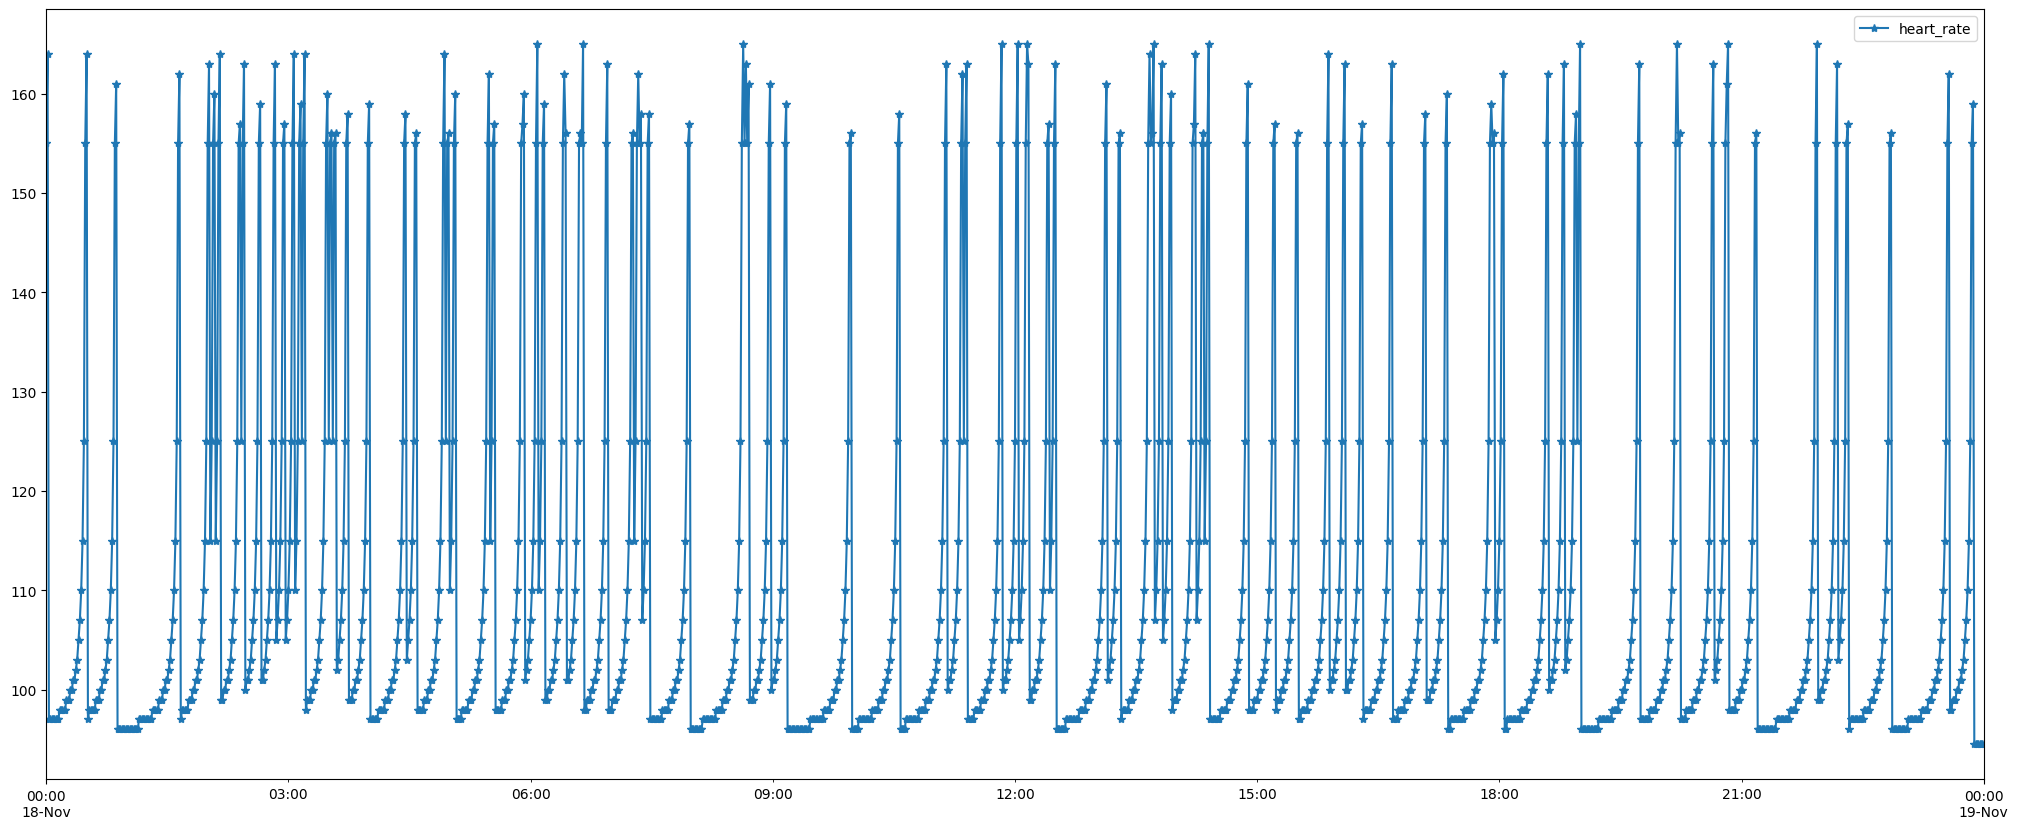

In [85]:
new_hr_df = pd.DataFrame({'heart_rate': new_hr_values}, index=timestamp)
new_hr_df.plot(marker='*', figsize=(25,10))